## Notebook to make vizualations of roster data
- created 8/26/24 by JBS

In [9]:
# SETUP

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# path ro TEMP folder
temp_folder = os.path.join(os.getcwd(), '..', 'TEMP')
# Data folder
data_folder = os.path.join(os.getcwd(), '..', 'data')
# Image folder
img_folder = os.path.join(os.getcwd(), '..', 'images')

# print list of files in data folder
# print(os.listdir(data_folder))
################################################################################
roster_file = os.path.join(data_folder, 'roster_2024_current_v2.csv') # PATH TO THE ROSTER FILE
roster = pd.read_csv(roster_file) # read as dataframe

# print(roster.head())
# roster.head()

,Current Team,Last_Name,First_Name,No,Position,Yr,Ht,Wt,DOB,Hometown,Height_Inches,Draft_Year,NHL_Team,D_Round,Last Team,League,City,State_Province,Country
0,Lake Superior,Barone,Adam,6,Defensemen,Fr,6-1,174,5/6/2004,"Sault Ste. Marie, Ont.",73,NaN,NaN,NaN,Trail,BCHL,Sault Ste. Marie,Ont.,Canada
1,Lake Superior,Blanchett,Jack,16,Defensemen,So,5-11,185,5/12/2003,"Monroe, Mich.",71,NaN,NaN,NaN,Powell,BCHL,Monroe,Mich.,USA
2,Lake Superior,Brown,Mike,3,Defensemen,Jr,6-2,209,4/3/2001,"Belmont, Mass.",74,NaN,NaN,NaN,Merrimack,NaN,Belmont,Mass.,USA
3,Lake Superior,Bushy,Evan,5,Defensemen,So,6-1,195,3/26/2002,"Mankato, Minn.",73,NaN,NaN,NaN,Trail,BCHL,Mankato,Minn.,USA
4,Lake Superior,Conrad,Jacob,4,Defensemen,Fr,5-11,180,5/18/2002,"Green Bay, Wis.",71,NaN,NaN,NaN,Fairbanks,NAHL,Green Bay,Wis.,USA


### Dictionaries and Constants

In [ ]:
## Conference Membership

atlantic = ['Air Force', "American Int'l", 'Army', 'Bentley', 'Canisius', 'Holy Cross', 'Mercyhurst', 
            'Niagara', 'RIT', 'Robert Morris', 'Sacred Heart', 'St. Lawrence', 'AIC', 'Bentley', 
            'Holy Cross', 'Mercyhurst', 'RIT', 'Sacred Heart']

big_ten = ['Michigan', 'Michigan State', 'Minnesota', 'Notre Dame', 'Ohio State', 'Penn State', 'Wisconsin']

ccha = ['Augustana', 'Bemidji State', 'Bowling Green', 'Ferris State', 'Lake Superior State', 'Michigan Tech', 
        'Minnesota State', 'Northern Michigan', 'St. Thomas']

ecac = ['Brown', 'Clarkson', 'Colgate', 'Cornell', 'Dartmouth', 'Harvard', 'Princeton', 'Quinnipiac',
        'Rensselaer', 'St. Lawrence', 'Union', 'Yale']

hockey_east = ['Boston College', 'Boston University', 'Connecticut', 'Maine', 'Massachusetts', 'Mass. Lowell',
                'Merrimack', 'New Hampshire', 'Northeastern', 'Providence', 'Vermont']

nchc = ['Arizona State', 'Colorado College', 'Denver', 'Miami', 'Minnesota Duluth', 'North Dakota', 'Omaha', 'St. Cloud State',
        'Western Michigan']

independents = ['Alaska-Anchorage', 'Alaska', 'Lindenwood', 'Long Island', 'Stonehill']

### Data Modifications

In [10]:
team_roster = roster.copy()

## NO LONGER NEEDED ############
# # Replace - with ' ' in team column
# team_roster['Current Team'] = team_roster['Current Team'].str.replace('-', ' ')

# Add a 'Season' column to the roster dataframe so I can use code written last season
team_roster['Season'] = 2024

# Convert the DOB to datetime
# If DOB is not in an appro datetime format drop the row
team_roster['DOB'] = pd.to_datetime(team_roster['DOB'], errors='coerce')
# team_roster['DOB'] = pd.to_datetime(team_roster['DOB'])
# Calculate Player Age in Years at the start of the season (Oct 1, Season), store as float of years
team_roster['Age'] = (team_roster['Season'] + 1) - team_roster['DOB'].dt.year



# team_roster.tail()
# GroupBy Season and Calculate the average age of each team each year and save as a dataframe
team_avg_age = team_roster.groupby('Current Team')['Age'].mean().reset_index()
# team_avg_age.head(40)

# Get a player count by season
player_count = team_roster.groupby('Current Team')['Last_Name'].count().reset_index()
player_count.head(10)

# team_avg_age

,Current Team,Last_Name
0,Air Force,32
1,Alaska,32
2,Alaska Anchorage,29
3,American Intl,33
4,Arizona State,31
5,Army,32
6,Augustana,28
7,Bemidji State,28
8,Bentley,28
9,Boston College,26


In [11]:
# Get a count of each class rank by team

# Create a pivot table of the class rank count
class_rank_count = team_roster.pivot_table(index='Current Team', columns='Yr', values='Last_Name', aggfunc='count', fill_value=0).reset_index()

# Calculate the total number of players on each team
class_rank_count['Total'] = class_rank_count['Fr'] + class_rank_count['So'] + class_rank_count['Jr'] + class_rank_count['Sr'] + class_rank_count['Gr']

# # Reorder the columns
# class_rank_count = class_rank_count[['Season', 'Current Team', 'Fr', 'So', 'Jr', 'Sr', 'Gr', 'Total']]
# # Convert the columns to int (0 for Nan)
# class_rank_count[['Fr', 'So', 'Jr', 'Sr', 'Gr', 'Total']] = class_rank_count[['Fr', 'So', 'Jr', 'Sr', 'Gr', 'Total']].fillna(0).astype(int)

# ## Add the average age to the class_rank_count
# # class_rank_count = class_rank_count.merge(team_avg_age, on='Season', how='left')


# Calculate the percentage of each class rank
class_rank_count['Fr%'] = class_rank_count['Fr'] / class_rank_count['Total']
class_rank_count['So%'] = class_rank_count['So'] / class_rank_count['Total']
class_rank_count['Jr%'] = class_rank_count['Jr'] / class_rank_count['Total']
class_rank_count['Sr%'] = class_rank_count['Sr'] / class_rank_count['Total']
class_rank_count['Gr%'] = class_rank_count['Gr'] / class_rank_count['Total']

# Reorder Columns
class_rank_count = class_rank_count[['Current Team', 'Fr', 'Fr%', 'So', 'So%', 'Jr', 'Jr%', 'Sr', 'Sr%', 'Gr', 'Gr%', 'Total']]

class_rank_count.tail(20)

Yr,Current Team,Fr,Fr%,So,So%,Jr,Jr%,Sr,Sr%,Gr,Gr%,Total
44,Notre Dame,5,0.178571,8,0.285714,4,0.142857,7,0.250000,4,0.142857,28
45,Ohio State,7,0.250000,9,0.321429,4,0.142857,4,0.142857,4,0.142857,28
46,Omaha,8,0.275862,3,0.103448,7,0.241379,4,0.137931,7,0.241379,29
47,Penn State,9,0.333333,6,0.222222,4,0.148148,6,0.222222,2,0.074074,27
48,Princeton,7,0.259259,7,0.259259,8,0.296296,5,0.185185,0,0.000000,27
49,Providence,9,0.321429,6,0.214286,2,0.071429,3,0.107143,8,0.285714,28
50,Quinnipiac,9,0.346154,6,0.230769,4,0.153846,3,0.115385,4,0.153846,26
51,RIT,7,0.269231,5,0.192308,7,0.269231,4,0.153846,3,0.115385,26
52,Rensselaer,7,0.250000,6,0.214286,2,0.071429,5,0.178571,8,0.285714,28
53,Robert Morris,10,0.333333,13,0.433333,3,0.100000,2,0.066667,2,0.066667,30


## Distribution of Heights and weights

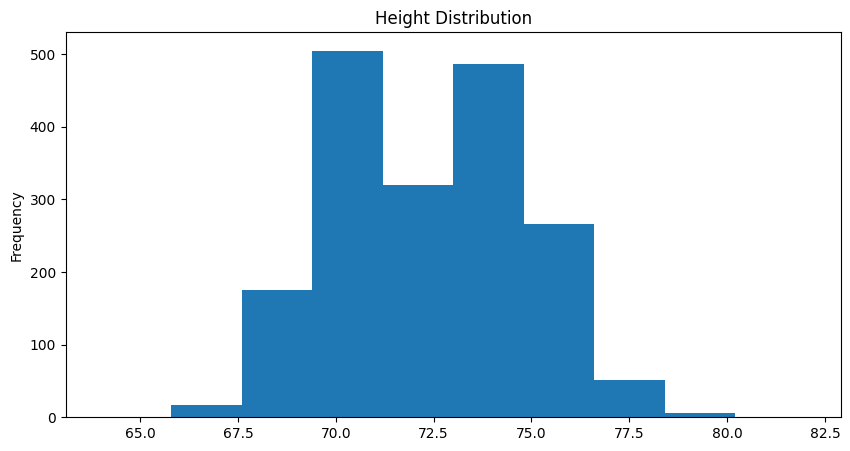

In [12]:
### Create histograme plots of the various player physical properties


## Height Distribution
# Set Randge of the histogram
plt.figure(figsize=(10, 5))
max_height = roster['Height_Inches'].max()
# set min for plot to 20 inches unter the max height
min_height = max_height - 20
# Filer out players outside of the range
roster = roster[(roster['Height_Inches'] >= min_height) & (roster['Height_Inches'] <= max_height)]

plt.hist(roster['Height_Inches'], bins=50, color='blue')
# drop rows with missing values
roster = roster.dropna(subset=['Height_Inches'])
roster['Height_Inches'].plot(kind='hist', title='Height Distribution')
plt.show()

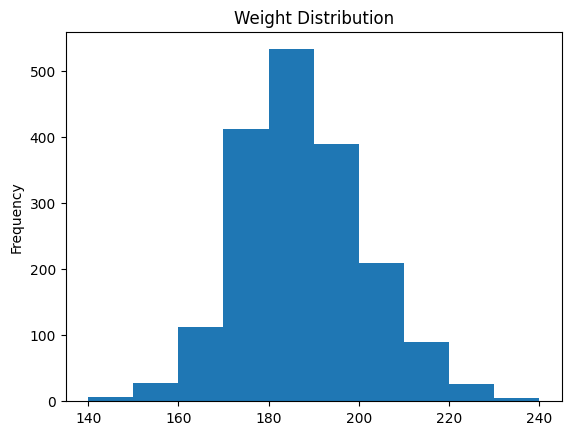

In [15]:
### Weight Distribution
# Set Randge of the histogram
# plt.figure(figsize=(10, 5))


# drop rows with missing values
roster = roster.dropna(subset=['Wt'])
max_weight = roster['Wt'].max()
# set min for plot to 150 lbs of the max weight
min_weight = max_weight - 150
# Filer out players outside of the range
roster = roster[(roster['Wt'] >= min_weight) & (roster['Wt'] <= max_weight)]

## Increase the number of bins to 100
plt.hist(roster['Wt'], bins=50, color='blue')



roster['Wt'].plot(kind='hist', title='Weight Distribution')
plt.show()

